In [0]:
#LISTS THE CONTENTS OF A DIRECTORY 
dbutils.fs.ls('/FileStore/tables/')

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1645021275000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.zip', size=5297592, modificationTime=1645399639000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645021210000),
 FileInfo(path='dbfs:/FileStore/tables/character_counting.ipynb', name='character_counting.ipynb', size=25386, modificationTime=1646061916000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1651771446000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1651771413000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1651770981000),
 FileInfo(path='dbfs:/FileStore/tables/

In [0]:
#CHECKING THE PATH OF TEMP FILE 
dbutils.fs.ls('file:/')

Out[2]: [FileInfo(path='file:/lib/', name='lib/', size=4096, modificationTime=1651751086494),
 FileInfo(path='file:/proc/', name='proc/', size=0, modificationTime=1651751127018),
 FileInfo(path='file:/usr/', name='usr/', size=4096, modificationTime=1651751085734),
 FileInfo(path='file:/lib32/', name='lib32/', size=4096, modificationTime=1642092477000),
 FileInfo(path='file:/var/', name='var/', size=4096, modificationTime=1651751086226),
 FileInfo(path='file:/srv/', name='srv/', size=4096, modificationTime=1642092479000),
 FileInfo(path='file:/mnt/', name='mnt/', size=4096, modificationTime=1651751129374),
 FileInfo(path='file:/bin/', name='bin/', size=36864, modificationTime=1650328945000),
 FileInfo(path='file:/libx32/', name='libx32/', size=4096, modificationTime=1642092477000),
 FileInfo(path='file:/home/', name='home/', size=4096, modificationTime=1644304204000),
 FileInfo(path='file:/root/', name='root/', size=4096, modificationTime=1651767721400),
 FileInfo(path='file:/etc/', nam

In [0]:
#COPYING THE FILE TO TEMP
dbutils.fs.cp('dbfs:/FileStore/tables/clinicaltrial_2021_csv.gz','file:/tmp/')

Out[3]: True

In [0]:
%sh
ls /tmp

Rserv
RtmpLfmPuS
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021_csv.gz
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-1505c-a8e79-be94d-7.json
ipykernel-connection-ReplId-25591-4276e-ca408-8.json
ipykernel-connection-ReplId-6942b-c65e2-5ff92-c.json
ipykernel-connection-ReplId-6a142-704a0-8d806-0.json
ipykernel-connection-ReplId-76a1e-bea47-79582-0.json
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-apache2.service-rqmQOh
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-ntp.service-A5wUyf
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-systemd-logind.service-WJeXYf
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-systemd-resolved.service-DzKgrh
tmp.nKFK5NCsPn


In [0]:
%sh
gzip -d /tmp/clinicaltrial_2021_csv.gz

In [0]:
%sh
ls /tmp

Rserv
RtmpLfmPuS
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021_csv
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-1505c-a8e79-be94d-7.json
ipykernel-connection-ReplId-25591-4276e-ca408-8.json
ipykernel-connection-ReplId-6942b-c65e2-5ff92-c.json
ipykernel-connection-ReplId-6a142-704a0-8d806-0.json
ipykernel-connection-ReplId-76a1e-bea47-79582-0.json
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-apache2.service-rqmQOh
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-ntp.service-A5wUyf
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-systemd-logind.service-WJeXYf
systemd-private-b4b2e70ac3f74c93adade24ddc06faa1-systemd-resolved.service-DzKgrh
tmp.nKFK5NCsPn


In [0]:
#MOVING THE FILE
dbutils.fs.mv("file:/tmp/clinicaltrial_2021_csv","dbfs:/FileStore/tables/clinicaltrial_2021.csv")

Out[8]: True

In [0]:
import os

In [0]:
#PROBLEM STATEMENT 1
# VIA DATAFRAME
myDF=spark.read.csv(path='/FileStore/tables/clinicaltrial_2021.csv',sep='|',header=True)
myDF.count()

Out[4]: 387261

In [0]:
#PROBLEM STATEMENT 2
#VIA DATAFRAME
df=spark.read.csv(path='/FileStore/tables/clinicaltrial_2021.csv',sep='|',header=True)
df=df.groupBy("Type").count()
df=df.orderBy("count",ascending=False).show(5)

+--------------------+------+
|                Type| count|
+--------------------+------+
|      Interventional|301472|
|       Observational| 77540|
|Observational [Pa...|  8180|
|     Expanded Access|    69|
+--------------------+------+



In [0]:
#PROBLEM STATEMENT 3
#VIA DATAFRAME
from pyspark.sql import SparkSession
from pyspark.sql.functions import split,explode,col,concat,lit,to_date,date_format,months,substring
spark=SparkSession.builder.getOrCreate()
df=spark.read.csv(path='/FileStore/tables/clinicaltrial_2021.csv',sep='|',header=True)
df=df.filter((df.Conditions.isNotNull()) | (df.Conditions != '')).select("Conditions")
df.withColumn('Conditions',explode(split('Conditions', ','))).groupBy("Conditions").count().orderBy('count', ascending=False).show(5)

+-----------------+-----+
|       Conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



In [0]:
#PROBLEM STATEMENT 4
#VIA DATAFRAME
ctrial=spark.read.csv(path='/FileStore/tables/clinicaltrial_2021.csv',sep='|',header=True)
mesh=spark.read.csv(path='/FileStore/tables/mesh.csv',sep=',',header=True)
df = ctrial.select(['Id','Conditions']).withColumn('Conditions',explode(split('Conditions', ',')))
df = df.join(mesh, df.Conditions == mesh.term, how = 'inner')
df.withColumn('new_tree', col('tree').substr(1, 3)).groupBy('new_tree').count().orderBy('count', ascending=False).show(10)

+--------+------+
|new_tree| count|
+--------+------+
|     C04|143994|
|     C23|136079|
|     C01|106674|
|     C14| 94523|
|     C10| 92310|
|     C06| 85646|
|     C08| 70720|
|     C13| 42599|
|     C18| 41276|
|     C12| 40161|
+--------+------+
only showing top 10 rows



In [0]:
#PROBLEM STATEMENT 5
#VIA DATAFRAME
pharma=spark.read.csv(path='/FileStore/tables/pharma.csv',sep=',',header=True)
pharma_exclusion = pharma.select('Parent_Company').distinct()
new_data = ctrial.join(pharma_exclusion, ctrial.Sponsor == pharma_exclusion.Parent_Company, how="left")
new_data.filter(new_data.Parent_Company.isNull()).groupBy('Sponsor').count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+
only showing top 10 rows



In [0]:
#PROBLEM STATEMENT 6
#VIA DATAFRAME
ctrial=spark.read.csv(path='/FileStore/tables/clinicaltrial_2021.csv',sep='|',header=True)
df = ctrial.select('Completion','Status',date_format(to_date('Completion', 'MMM yyyy'),'MM-dd-yyyy').alias('com'))
df1 =df.where(substring("Completion",5,8) == "2021")
df2 = df1.where(df.Status == "Completed")
df3 =df2.select(substring("Completion",1,3).alias("Month"),"Status","com")
df4= df3.select("Month","com").where(df3.Month.isNotNull()).groupBy("Month","com").count().orderBy("com",ascending = True)
df5=df4.select("Month","count")
df5.show(12)

+-----+-----+
|Month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



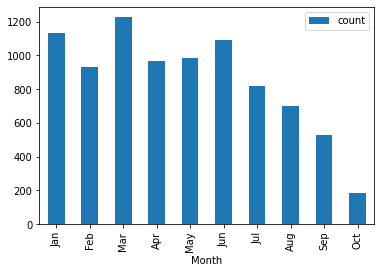

In [0]:
#DISPLAYING BARPLOT FOR PROBLEM STATEMENT 6  
import numpy as np
import matplotlib.pyplot as Barplot
plot_month_count = df5.toPandas()
plot_month_count.sort_values('Month')
plot_month_count.plot(kind= 'bar',x='Month',y='count')
Barplot.show()